In [1]:
print("sairam")

sairam


In [531]:
import pandas as pd
import google_play_scraper
from google_play_scraper import Sort, reviews_all
import random
import langdetect
import nltk
from nltk.tokenize import sent_tokenize

In [307]:
from google_play_scraper import Sort, reviews

rev_5 = []
rev_4 = []
rev_3 = []
rev_2 = []
rev_1 = []

for i in range(1,6):
    print(f'Extraction for review {i}')
    result, continuation_token = reviews(
        'com.picnic.android',
        #lang='en', # defaults to 'en'
        #country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.NEWEST
        count=9999, # defaults to 100
        filter_score_with=i # defaults to None(means all score)
        
    )
    if i == 1:
        rev_1.append(result)
    elif i == 2:
        rev_2.append(result)
    elif i == 3:
        rev_3.append(result)
    elif i == 4:
        rev_4.append(result)
    elif i == 5:
        rev_5.append(result)
        
        
print(f"Rev1: {len(rev_1[0])} | Rev2: {len(rev_2[0])} | Rev3: {len(rev_3[0])} | Rev4: {len(rev_4[0])} | Rev5: {len(rev_5[0])} ")

Extraction for review 1
Extraction for review 2
Extraction for review 3
Extraction for review 4
Extraction for review 5
Rev1: 199 | Rev2: 0 | Rev3: 0 | Rev4: 0 | Rev5: 199 


In [295]:
rev1_df = pd.DataFrame(rev_1[0])
rev5_df = pd.DataFrame(rev_5[0])
rev_df = pd.concat([rev1_df, rev5_df], axis=0)
print(rev_df.shape)
print(rev_df['reviewId'].nunique())
print(rev_df['score'].value_counts())
rev_df.head()


(995, 11)
995
score
5    796
1    199
Name: count, dtype: int64


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d9ee3e53-2160-4387-ad7a-40cc69b55a1d,Adam Moumene,https://play-lh.googleusercontent.com/a-/ALV-U...,"Très mauvaise expérience commande non livrée, ...",1,0,1.15.233,2024-04-01 23:03:35,Je suis navré pour la mauvaise expérience que ...,2024-04-05 20:40:55,1.15.233
1,e3e87373-aaef-4ed2-b55c-1690882e21c9,RD Moncure,https://play-lh.googleusercontent.com/a/ACg8oc...,"can get in, app will not down load app, WHY?????",1,0,1.15.233,2024-03-22 14:27:28,"Hi, How annoying that you can't download the a...",2024-03-22 16:25:05,1.15.233
2,a6833f9e-e584-4eed-97b5-75d2147a6f92,Sebastiaan M,https://play-lh.googleusercontent.com/a-/ALV-U...,Niet de moeite. Niet goedkoper dan andere supe...,1,0,1.15.232,2024-03-19 18:39:48,"Hoi Sebastiaan, bedankt voor je eerlijke revie...",2024-03-19 14:08:59,1.15.232
3,1cff882a-2fcc-43a3-b0e7-b1e967f38ac0,DarkFay72,https://play-lh.googleusercontent.com/a-/ALV-U...,"Bevor ich auch nur mal gucken darf, was die üb...",1,0,1.15.231,2024-03-17 23:20:48,Nimm gerne per WhatsApp (+49 211 38789148) ode...,2024-03-23 00:45:16,1.15.231
4,e110f7f5-1407-4b91-adc3-2e8a953ffd64,Sandra van Wijk,https://play-lh.googleusercontent.com/a-/ALV-U...,"Goede app, maar daadwerkelijke levering is hel...",1,0,1.15.228,2024-02-27 21:01:52,"Hoi Sandra, Bedankt voor de feedback! Ik ga de...",2024-02-27 22:43:31,1.15.228


In [337]:

def get_more_rev():
    result_all = reviews_all(
        'com.picnic.android'
        #sleep_milliseconds=0, # defaults to 0
        #lang='en', # defaults to 'en'
        #country='us', # defaults to 'us'
        #sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
        #filter_score_with=score # defaults to None(means all score)
    )
    return pd.DataFrame(result_all)

In [ ]:
#final_rev_df = rev_df.copy()
print(f"while starting - final_rev_df: {final_rev_df.shape}")
for i in range(1000):
    extra_rev_df = get_more_rev()
    final_rev_df = pd.concat([final_rev_df, extra_rev_df], axis=0).drop_duplicates(subset=['reviewId'])
    print(final_rev_df.shape)
print(f"while ending - final_rev_df: {final_rev_df.shape}")
    

In [350]:
final_rev_df['score'].value_counts()

score
5    796
1    353
4    145
3     84
2     75
Name: count, dtype: int64

In [381]:
final_rev_df.reset_index(drop=True, inplace=True)
final_rev_df.to_csv('review_extract.csv', header=True, index=False)

In [360]:
# Text for which you want to detect the language
text = "Niet de moeite. Niet goedkoper dan andere supermarkten die wel zonder app werken, maar de app maakt het een stuk moeilijker vergelijken. Je hoeft je niet in bochten te wringen een app te gebruiken om je boodschappen te bestellen, voor al mijn wekelijkse boodschappen is de lokale supermarktwebsite even goedkoop, vaak zelfs goedkoper, en die werkt zonder app. Gelukkig maar, want ik keek er niet naar uit mijn boodschappen in een app te moeten bestellen. Edit: Ook online dus, de lokale supermarkt"

# Detect the language
language = langdetect.detect(text)

print(f"The language of the text is: {language}")

The language of the text is: nl


In [382]:
def check_lang( text):
        return langdetect.detect(text)

In [385]:
final_rev_df['content'][0:5].apply(check_lang)

0    fr
1    en
2    nl
3    de
4    nl
Name: content, dtype: object

In [386]:
final_rev_df['content'][0]

'Très mauvaise expérience commande non livrée, pas de remboursement ni de re-livraison possible. Horrible first experience, the ordered was not delivered and neither a delivery rescheduling nor a refund were offered.'

In [391]:
final_rev_df['length'] = final_rev_df['content'].apply(lambda x: len(x))
final_rev_df['length'].value_counts().sort_values(ascending=False)

length
14     18
11     16
9      16
13     15
10     15
       ..
263     1
351     1
284     1
491     1
575     1
Name: count, Length: 385, dtype: int64

In [394]:
final_rev_df[final_rev_df['length'] == 1]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,length
596,c522117c-708b-4837-8df8-15fb9c06c520,jackie j.,https://play-lh.googleusercontent.com/a/ACg8oc...,👍,5,0,1.15.112,2021-11-18 06:23:12,None,NaT,1.15.112,1
716,e35b06d7-2508-4104-acb2-82a69cbc0960,Delphine Girard,https://play-lh.googleusercontent.com/a-/ALV-U...,🙂,5,0,1.15.43,2020-05-13 14:48:44,"Hi Delphine, leuk om te horen! Groeten, Victor...",2020-05-13 15:05:04,1.15.43,1


In [396]:
import emoji
emoji.demojize(final_rev_df['content'].iloc[716])

':slightly_smiling_face:'

In [405]:
emoji_ranges = {
    "Miscellaneous Symbols and Pictographs": (0x1F300, 0x1F5FF),
    "Emoticons": (0x1F600, 0x1F64F),
    "Transport and Map Symbols": (0x1F680, 0x1F6FF),
    "Alchemical Symbols": (0x1F700, 0x1F77F),
    "Geometric Shapes Extended": (0x1F780, 0x1F7FF),
    "Supplemental Arrows-C": (0x1F800, 0x1F8FF),
    "Supplemental Symbols and Pictographs": (0x1F900, 0x1F9FF),
    "Chess Symbols": (0x1FA00, 0x1FA6F),
    "Symbols and Pictographs Extended-A": (0x1FA70, 0x1FAFF),
    "Miscellaneous Symbols": (0x2600, 0x26FF),
    "Dingbats": (0x2700, 0x27BF),
    "Variation Selectors": (0xFE00, 0xFE0F),
    "Supplemental Symbols and Pictographs": (0x1F900, 0x1FAFF)
}
emoji_ranges.values()

dict_values([(127744, 128511), (128512, 128591), (128640, 128767), (128768, 128895), (128896, 129023), (129024, 129279), (129280, 129791), (129536, 129647), (129648, 129791), (9728, 9983), (9984, 10175), (65024, 65039)])

In [409]:
text_with_emojis = final_rev_df['content'].iloc[0]

# Check if text contains emojis
has_emojis = any(any(start <= ord(char) <= end for char in text_with_emojis)
                 for start, end in emoji_ranges.values())

if has_emojis:
    print("The text contains emojis.")
else:
    print("The text does not contain emojis.")

The text does not contain emojis.


In [418]:
def clean_emoji(text):
    has_emojis = any(any(start <= ord(char) <= end for char in text)
                for start, end in emoji_ranges.values())
    print(has_emojis)
    if has_emojis:
        test_without_emoji = emoji.demojize(text)
    else:
        test_without_emoji = text
    return test_without_emoji

In [419]:
clean_emoji(final_rev_df['content'].iloc[716])

True


':slightly_smiling_face:'

In [539]:
       
import pandas as pd
import os
import langdetect
from dataclasses import dataclass
import emoji
from utils import translate_text

@dataclass
class config:
    INPUT_FILE_PATH = 'review_extract.csv'
    EMOJI_RANGES = {
                    "Miscellaneous Symbols and Pictographs": (0x1F300, 0x1F5FF),
                    "Emoticons": (0x1F600, 0x1F64F),
                    "Transport and Map Symbols": (0x1F680, 0x1F6FF),
                    "Alchemical Symbols": (0x1F700, 0x1F77F),
                    "Geometric Shapes Extended": (0x1F780, 0x1F7FF),
                    "Supplemental Arrows-C": (0x1F800, 0x1F8FF),
                    "Supplemental Symbols and Pictographs": (0x1F900, 0x1F9FF),
                    "Chess Symbols": (0x1FA00, 0x1FA6F),
                    "Symbols and Pictographs Extended-A": (0x1FA70, 0x1FAFF),
                    "Miscellaneous Symbols": (0x2600, 0x26FF),
                    "Dingbats": (0x2700, 0x27BF),
                    "Variation Selectors": (0xFE00, 0xFE0F),
                    "Supplemental Symbols and Pictographs": (0x1F900, 0x1FAFF)
                    }
    
class DataIngestion:
    def __init__(self, file_path):
        self.file_path = file_path
        
    def read_input(self):
        return pd.read_csv(self.file_path)
    
    def impute_emoji(self, text):
        has_emojis = any(any(start <= ord(char) <= end for char in text)
                 for start, end in config.EMOJI_RANGES.values())

        if has_emojis:
            test_without_emoji = emoji.demojize(text)
        else:
            test_without_emoji = text
        return test_without_emoji
    
    def clean_emoji(self, df, col_to_inspect):
        temp = df.copy()
        temp['content_cleaned'] = temp[col_to_inspect].apply(self.impute_emoji)
        return temp
    
    def check_lang(self, text):
        return langdetect.detect(text)
    
    def detect_language(self, df, col_to_inspect):
        df['language'] = df[col_to_inspect].apply(self.check_lang)
        return df
    
    def translate_to_en(self, df):
        temp = df.copy()
        temp['translated_review'] = temp.apply(lambda row: translate_text(row['content_cleaned'], row['language']) if row['language'] != 'en' else row['content_cleaned'], axis=1)
        return temp
    
        def combine_star_reviews(self, df, rating_col, col_to_check):
            review_1_star = ''
            review_2_star = ''
            review_3_star = ''
            review_4_star = ''
            review_5_star = ''

            for i in sorted(df[rating_col].unique()):
                comb_rev = ''
                comb_rev = "\n".join(df[df[rating_col] == i][col_to_check])
                
                if i == 1:
                    review_1_star = comb_rev
                elif i == 2:
                    review_2_star = comb_rev
                elif i == 3:
                    review_3_star = comb_rev
                elif i == 4:
                    review_4_star = comb_rev
                elif i == 5:
                    review_5_star = comb_rev
                    
            print(f'review_1_star: {len(review_1_star)} | review_2_star: {len(review_2_star)} | review_3_star: {len(review_3_star)} | review_4_star: {len(review_4_star)} | review_5_star: {len(review_5_star)}')        
            print('review_1_star:', review_1_star[0:100])
            print('review_5_star:', review_5_star[0:100])
            return review_1_star, review_2_star, review_3_star, review_4_star, review_5_star    
    def combine_star_reviews(self, df, rating_col, col_to_check):
        review_1_star = ''
        review_2_star = ''
        review_3_star = ''
        review_4_star = ''
        review_5_star = ''

        for i in sorted(df[rating_col].unique()):
            comb_rev = ''
            comb_rev = "\n".join(df[df[rating_col] == i][col_to_check])
            
            if i == 1:
                review_1_star = comb_rev
            elif i == 2:
                review_2_star = comb_rev
            elif i == 3:
                review_3_star = comb_rev
            elif i == 4:
                review_4_star = comb_rev
            elif i == 5:
                review_5_star = comb_rev
                
        print(f'review_1_star: {len(review_1_star)} | review_2_star: {len(review_2_star)} | review_3_star: {len(review_3_star)} | review_4_star: {len(review_4_star)} | review_5_star: {len(review_5_star)}')        
        print('review_1_star:', review_1_star[0:100])
        print('review_5_star:', review_5_star[0:100])
        return review_1_star, review_2_star, review_3_star, review_4_star, review_5_star    
    
    def create_chunks(self, text, max_length):
        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Define the maximum length for each chunk
        max_length = max_length

        # Initialize chunks list
        chunks = []

        # Initialize current chunk and current length
        current_chunk = ""
        current_length = 0

        # Iterate over each sentence
        for sentence in sentences:
            # If adding the sentence to the current chunk would exceed the maximum length, start a new chunk
            if current_length + len(sentence.split()) > max_length:
                chunks.append(current_chunk.strip())
                current_chunk = ""
                current_length = 0
            
            # Add the sentence to the current chunk
            current_chunk += sentence + " "
            current_length += len(sentence.split()) + 1  # Add 1 for the space

        # Add the last chunk
        if current_chunk:
            chunks.append(current_chunk.strip())

        return chunks





In [541]:
if __name__ == '__main__':
    print("sairam")
    dataingestion = DataIngestion(config.INPUT_FILE_PATH)
    #review_data   = dataingestion.read_input()
    #review_data_cleaned = dataingestion.clean_emoji(review_data, 'content')
    #review_data_cleaned   = dataingestion.detect_language(review_data_cleaned, 'content_cleaned')
    review_data_translated = pd.read_csv('review_data_translated.csv')
    review_1_star, review_2_star, review_3_star, review_4_star, review_5_star = dataingestion.combine_star_reviews(review_data_translated, 'score', 'translated_review')
    

sairam
review_1_star: 55981 | review_2_star: 16246 | review_3_star: 16650 | review_4_star: 26146 | review_5_star: 90555
review_1_star: Très mauvaise expérience commande non livrée, pas de remboursement ni de re-livraison possible. Horr
review_5_star: Great app, our number 1 choice. We have been ordering our entire weekly grocery shopping via PicNic 


In [568]:
len(review_5_star[0:85000].split())

14358

In [586]:
a = 'sundar'; b = 'sai'; c='ram'
a + '\n' + b + ' ' + c

'sundar\nsai ram'

(array([761., 346., 146.,  81.,  58.,  50.,   6.,   2.,   1.,   2.]),
 array([  1. ,  17.7,  34.4,  51.1,  67.8,  84.5, 101.2, 117.9, 134.6,
        151.3, 168. ]),
 <BarContainer object of 10 artists>)

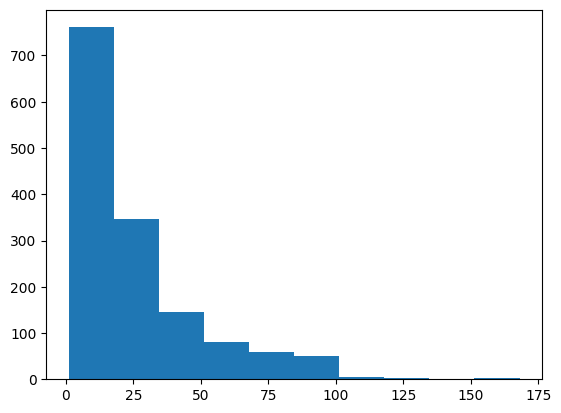

In [577]:
review_data_translated['rev_len'] = review_data_translated['translated_review'].apply(lambda x: len(x.split()))
review_data_translated[['translated_review', 'rev_len']]
plt.hist(review_data_translated['rev_len'])

In [581]:
review_data_translated[review_data_translated['rev_len'] == 1]

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_cleaned,language,translated_review,rev_len
321,321,5130b578-855f-4f90-a840-24dc3cfb00a6,Margaret,https://play-lh.googleusercontent.com/a-/ALV-U...,Super!,5,0,1.15.189,2023-05-20 18:32:35,NaN,NaN,1.15.189,Super!,id,Hebat!,1
322,322,a65f467c-0040-4862-bbaa-f69bd4172e95,W H,https://play-lh.googleusercontent.com/a/ACg8oc...,Top,5,0,1.15.189,2023-05-17 15:47:34,NaN,NaN,1.15.189,Top,en,Top,1
391,391,93d12b98-7f5d-481e-8967-f77d05281b5b,Andrea Navarro,https://play-lh.googleusercontent.com/a/ACg8oc...,Top,5,0,1.15.160,2022-10-12 23:36:36,NaN,NaN,1.15.160,Top,en,Top,1
404,404,1ec642c9-7b5f-438b-ae7c-f1000c8a9dd5,Nane Danza,https://play-lh.googleusercontent.com/a-/ALV-U...,Perfect!,5,0,1.15.153,2022-09-06 15:09:37,"Hallo, vielen Dank für dein tolles Feedback :)...",2022-09-06 18:59:03,1.15.153,Perfect!,en,Perfect!,1
417,417,6b212f05-c81e-4e4a-ac58-9d163cbc94df,Tamara Ramsey,https://play-lh.googleusercontent.com/a-/ALV-U...,Top,5,0,1.15.148,2022-08-02 01:21:53,NaN,NaN,1.15.148,Top,en,Top,1
457,457,89a4e184-79cd-47fd-a6e1-6b7bc0292b88,Ansje,https://play-lh.googleusercontent.com/a/ACg8oc...,Perfect,5,0,1.15.132,2022-04-23 20:08:22,Hi Ansje! Thank you for taking the time to wri...,2022-05-02 15:36:10,1.15.132,Perfect,en,Perfect,1
477,477,5cbd853b-7f99-400d-9b49-6d7dea48bb84,Frederik,https://play-lh.googleusercontent.com/a/ACg8oc...,Goeie,5,0,1.15.133,2022-04-18 03:16:15,"Hoi Frederik, bedankt voor je review! Wat fijn...",2022-04-18 16:49:00,1.15.133,Goeie,af,"""Good.""",1
496,496,8ff64f04-bc56-4cac-bc40-ae1fd00de0b4,D.Day Foundation,https://play-lh.googleusercontent.com/a-/ALV-U...,Perfect,5,0,1.15.130,2022-03-31 16:17:22,"Hi, thank you for taking the time to write thi...",2022-04-10 19:03:15,1.15.130,Perfect,en,Perfect,1
506,506,0df3446a-0ae3-440b-a35e-087ee8bc774f,tine tkkr,https://play-lh.googleusercontent.com/a/ACg8oc...,Geweldig!,5,0,1.15.112,2022-03-20 21:16:30,"Dank je wel Tine! Groetjes, Dani van Picnic.",2022-03-21 02:12:53,1.15.112,Geweldig!,af,"""Wonderful!""",1
521,521,fba8ae57-506f-4490-9dfb-861f78030edb,Natalie Samson,https://play-lh.googleusercontent.com/a-/ALV-U...,Geweldig!!!,5,0,1.15.126,2022-02-28 16:09:24,"Hoi Natalie, bedankt voor je review! Wat leuk ...",2022-05-08 19:13:42,1.15.126,Geweldig!!!,af,Great!!!,1


In [587]:
temp = {}
temp['who are you'] = 'I am sundar'
temp

{'who are you': 'I am sundar'}

In [597]:
pd.DataFrame(list(temp.items()), index=range(len(temp)), columns=['Question', 'Insights'])

,Question,Insights
0,who are you,I am sundar


In [616]:
review_data_translated.shape

(1453, 16)

In [602]:
temp = pd.DataFrame(review_data_translated['language'].value_counts())
temp.reset_index(inplace=True)
temp

,language,count
0,en,829
1,nl,410
2,de,100
3,af,32
4,fr,15
5,no,9
6,ca,7
7,da,7
8,ro,7
9,tl,5


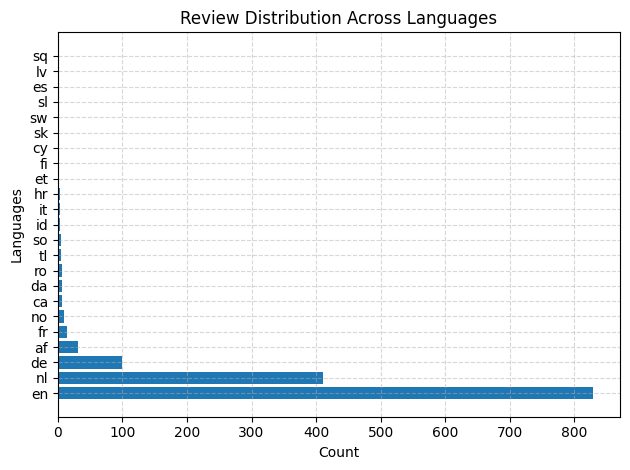

In [614]:
import matplotlib.pyplot as plt
plt.barh(temp['language'], temp['count']) 
plt.xlabel('Count')
plt.ylabel('Languages')
plt.title('Review Distribution Across Languages')
plt.tight_layout()
plt.grid(alpha=0.5, linestyle='--')
plt.savefig("language.jpg", dpi=300)
plt.show()


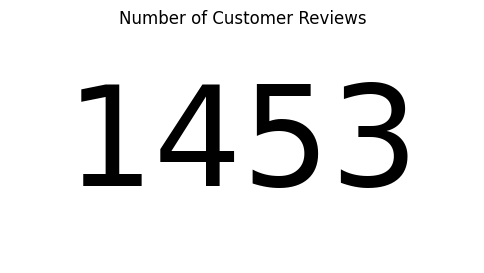

<Figure size 640x480 with 0 Axes>

In [618]:
import matplotlib.pyplot as plt

# Single value
value = 1453

# Create a number plot
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, str(value), fontsize=100, ha='center', va='center')
plt.axis('off')  # Turn off axis

# Add a title
plt.title('Number of Customer Reviews')
plt.savefig("rev_count.jpg", dpi=300)
# Show the plot
plt.show()

